In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import folium
import os
from folium.features import DivIcon

In [2]:
df = pd.read_excel(r'C:\Users\Mi Notebook\Downloads\US State Wind Energy Facts 2018.xlsx')

In [3]:
df.drop(df.index[40:], inplace=True)

In [4]:
df.columns

Index(['Ranking', 'State', 'Installed Capacity (MW)',
       'Equivalent Homes Powered', 'Total Investment ($ Millions)',
       'Wind Projects Online', '# of Wind Turbines'],
      dtype='object')

In [5]:
df['$ per Turbine'] = (df['Total Investment ($ Millions)']/df['# of Wind Turbines']).round(2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 8 columns):
Ranking                          40 non-null float64
State                            40 non-null object
Installed Capacity (MW)          40 non-null int64
Equivalent Homes Powered         40 non-null float64
Total Investment ($ Millions)    40 non-null float64
Wind Projects Online             40 non-null int64
# of Wind Turbines               40 non-null float64
$ per Turbine                    40 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 2.8+ KB


In [7]:
abr = pd.read_excel(r'C:\Users\Mi Notebook\Desktop\US_STATES_Abbreviations.xlsx')

In [9]:
df['State'] = df['State'].str.encode('utf-8')
abr['State'] = abr['State'].str.encode('utf-8')
df['State'] = df['State'].str.strip()
abr['State'] = abr['State'].str.strip()
result = pd.merge(df, abr, how='inner', on='State')

In [41]:
geo_sites = pd.read_excel(r'C:\Users\Mi Notebook\Desktop\Capitals_Geo_Pos.xlsx')

In [43]:
result = pd.merge(result, geo_sites, how='inner', left_on='Abbreviation', right_on='STATE_ABBR')

In [47]:
result.drop(columns=['STATE','STATE_ABBR'], inplace=True)

In [53]:
result

,Ranking,State,Installed Capacity (MW),Equivalent Homes Powered,Total Investment ($ Millions),Wind Projects Online,# of Wind Turbines,$ per Turbine,Abbreviation,LATITUDE,LONGITUDE
0,1.0,b'TEXAS',23262,6235000.0,42000.0,136,12750.0,3.29,TX,31.054487,-97.563461
1,2.0,b'OKLAHOMA',7495,2268000.0,13700.0,45,3717.0,3.69,OK,35.565342,-96.928917
2,3.0,b'IOWA',7312,1935000.0,14200.0,107,4145.0,3.43,IA,42.011539,-93.210526
3,4.0,b'CALIFORNIA',5686,1298000.0,12600.0,104,6972.0,1.81,CA,36.116203,-119.681564
4,5.0,b'KANSAS',5110,1719000.0,9400.0,35,2795.0,3.36,KS,38.526600,-96.726486
5,6.0,b'ILLINOIS',4464,1050000.0,8900.0,49,2632.0,3.38,IL,40.349457,-88.986137
6,7.0,b'MINNESOTA',3699,1012000.0,7100.0,98,2428.0,2.92,MN,45.694454,-93.900192
7,8.0,b'OREGON',3213,604600.0,6600.0,31,1868.0,3.53,OR,44.572021,-122.070938
8,9.0,b'COLORADO',3106,889100.0,6000.0,25,1949.0,3.08,CO,39.059811,-105.311104
9,10.0,b'WASHINGTON',3075,695300.0,6100.0,20,1725.0,3.54,WA,47.400902,-121.490494


In [11]:
result['Abbreviation'] = result['Abbreviation'].str.strip()

In [13]:
result.head()

,Ranking,State,Installed Capacity (MW),Equivalent Homes Powered,Total Investment ($ Millions),Wind Projects Online,# of Wind Turbines,$ per Turbine,Abbreviation
0,1.0,b'TEXAS',23262,6235000.0,42000.0,136,12750.0,3.29,TX
1,2.0,b'OKLAHOMA',7495,2268000.0,13700.0,45,3717.0,3.69,OK
2,3.0,b'IOWA',7312,1935000.0,14200.0,107,4145.0,3.43,IA
3,4.0,b'CALIFORNIA',5686,1298000.0,12600.0,104,6972.0,1.81,CA
4,5.0,b'KANSAS',5110,1719000.0,9400.0,35,2795.0,3.36,KS


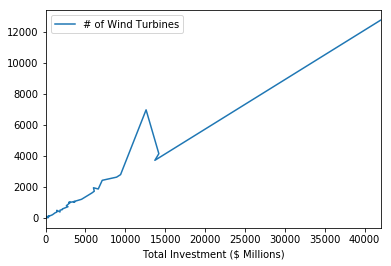

In [14]:
df.plot(x ='Total Investment ($ Millions)', y = '# of Wind Turbines', kind = 'line')

In [16]:
state_geo = os.path.join(r'C:\Users\Mi Notebook\Desktop\us-states.json')

In [70]:
m = folium.Map(location=[48, -102], zoom_start=3)

folium.map.Marker(
    [54, -118.2352],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 12pt">US State Wind Energy Facts 2018</div>',
        )
    ).add_to(m)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=result,
    columns=['Abbreviation', 'Installed Capacity (MW)'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Installed Capacity (MW)'
).add_to(m)

for index, row in result.iterrows():

    # generate the popup message that is shown on click.
    popup_text = "{}<br> Capacity (MW): {:,}<br> Investments ($ mln): {:,}<br> Equiv.Homes Powered: {:,}"
    popup_text = popup_text.format(
                      row["Abbreviation"],
                      row["Installed Capacity (MW)"],
                      row["Total Investment ($ Millions)"],
                      row["Equivalent Homes Powered"]
                      )

    folium.CircleMarker(location=(row["LATITUDE"],
                                  row["LONGITUDE"]),
                        radius= row['$ per Turbine']*2,
                        color='crimson',
                        fill_color = 'k',
                        popup=popup_text,
                        fill=False).add_to(m)
    
# folium.LayerControl().add_to(m)
m.save('choropleth_windmills.html')
m